# Introduction

We intend to analyze the neighborhoods in City of London and will try to understand and explore neighborhoods.Our intention is to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters.
We will use the Foursquare API to explore neighborhoods and get the relevant data for each neighborhood.
We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in London City and their emerging clusters. This project will be useful for people coming in the City of London , which will help them with an idea of how similar and diverse different neighborhoods in the City of London are. It would help them choose/pick the places of their choice easily , for the different activities they would like to do in the City of London.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need :

In [1]:
!conda install -c conda-forge lxml --yes
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


## 1. Download and Explore Dataset

Here we are creating a DataFrame from the London data available on : "https://en.wikipedia.org/wiki/List_of_London_boroughs"

In [2]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_London_boroughs")
df1 = pd.DataFrame(tables[0])
df1.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [3]:
df1.rename(columns = {'Population (2013 est)[1]':'Population'}, inplace = True)

In [4]:
df1=df1.drop(columns=['Nr. in map'])

Cleaning data in Column - Borough

In [5]:
import re

def remove_all_digits(borough):
    new_borough = re.sub('\d', '', borough)
    return new_borough


def remove_all_brackets(borough):
    new_borough = re.sub('\[]', '', borough)
    return new_borough

def remove_all_note(borough):
    new_borough = re.sub('\[', '', borough)
    return new_borough

In [6]:
df1['Borough'] = df1['Borough'].apply(remove_all_digits)
df1['Borough'] = df1['Borough'].apply(remove_all_brackets)
df1.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates
0,Barking and Dagenham [note ],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


In [7]:
df1.iloc[0,0] = 'Barking and Dagenham'
df1.iloc[11,0] = 'Hammersmith and Fulham'
df1.iloc[9,0] = 'Greenwich'

Changing name of column Co-ordinates to Coordinates and Creating 2 separate columns from column --> Coordinates

In [8]:
df1.rename(columns = {'Co-ordinates':'Coordinates'}, inplace = True)
df1[['Cordinate1','Cordinate2']] = df1.Coordinates.str.split("/",expand=True,)
df1.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Coordinates,Cordinate1,Cordinate2
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E


Drop irrelevant Columns and retaining Column containing Latitude and Longitude of Places in degrees.

In [9]:
df1=df1.drop(columns=['Coordinates'])
df1=df1.drop(columns=['Cordinate1'])

Now separating Latitudes and Longitudes from the last Column and then putting them in separate columns

In [10]:
column1 = df1.Cordinate2
sub_df1 = pd.DataFrame(column1.str.split(expand=True,))
df1[['Latitude','Longitude']] = sub_df1
df1.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Cordinate2,Latitude,Longitude
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,﻿51.5607°N 0.1557°E,﻿51.5607°N,0.1557°E
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,﻿51.6252°N 0.1517°W,﻿51.6252°N,0.1517°W
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549°N 0.1505°E,﻿51.4549°N,0.1505°E
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588°N 0.2817°W,﻿51.5588°N,0.2817°W
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039°N 0.0198°E,﻿51.4039°N,0.0198°E


Next we are removing the Irrelavant columns- Cordinate2/Inner and Status

In [11]:
df1=df1.drop(columns=['Cordinate2'])
df1=df1.drop(columns=['Inner'])
df1=df1.drop(columns=['Status'])

Having done that we clean data in Columns Latitude & Longitude(removing degress and letter 'W' , 'E' and 'N')

In [12]:
df1['Latitude'] = df1['Latitude'].replace('\u00b0','', regex=True)
df1['Longitude'] = df1['Longitude'].replace('\u00b0','', regex=True)
def remove_characterN(Latitude):
    new_lat = re.sub('N', '', Latitude)
    return new_lat
def remove_characterW(Longitude):
    new_lon = re.sub('W', '', Longitude)
    return new_lon
def remove_characterE(Longitude):
    new_lon = re.sub('E', '', Longitude)
    return new_lon

In [13]:
df1['Latitude'] = df1['Latitude'].apply(remove_characterN)
df1['Longitude'] = df1['Longitude'].apply(remove_characterW)
df1['Longitude'] = df1['Longitude'].apply(remove_characterE)
df1.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population,Latitude,Longitude
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,﻿51.5607,0.1557
1,Barnet,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,﻿51.6252,0.1517
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,﻿51.4549,0.1505
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,﻿51.5588,0.2817
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,﻿51.4039,0.0198


In [14]:
df1.dtypes

Borough               object
Local authority       object
Political control     object
Headquarters          object
Area (sq mi)         float64
Population             int64
Latitude              object
Longitude             object
dtype: object

In [15]:
df1['Longitude'] = df1['Longitude'].astype(float)

##### df1['Latitude'] = df1['Latitude'].astype(float) ---> This throws error -ValueError: could not convert string to float: '\ufeff51.5607'
 
##### This is because each value in Column "Latitude" has extra masking of \ufeff

Here is how we get rid of that :

In [16]:
my_list = []
my_list = df1.Latitude

new_list = []
for i in my_list: 
    i = i.replace('\ufeff', '')
    new_list.append(i)
    
new_list

['51.5607',
 '51.6252',
 '51.4549',
 '51.5588',
 '51.4039',
 '51.5290',
 '51.3714',
 '51.5130',
 '51.6538',
 '51.4892',
 '51.5450',
 '51.4927',
 '51.6000',
 '51.5898',
 '51.5812',
 '51.5441',
 '51.4746',
 '51.5416',
 '51.5020',
 '51.4085',
 '51.4607',
 '51.4452',
 '51.4014',
 '51.5077',
 '51.5590',
 '51.4479',
 '51.5035',
 '51.3618',
 '51.5099',
 '51.5908',
 '51.4567',
 '51.4973']

In [17]:
df_newest = pd.DataFrame(new_list)
df_newest.columns = ['Latitudes']
df_newest['Latitudes'] = df_newest['Latitudes'].astype(float)
df_newest

,Latitudes
0,51.5607
1,51.6252
2,51.4549
3,51.5588
4,51.4039
5,51.5290
6,51.3714
7,51.5130
8,51.6538
9,51.4892


Next step of ours is to  add this new correct dataframe as a Column to our master DataFrame and remove old one

In [18]:
df1=df1.drop(columns=['Latitude'])
df1['Latitude'] = df_newest
df1.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population,Longitude,Latitude
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,0.1557,51.5607
1,Barnet,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,0.1517,51.6252
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,0.1505,51.4549
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,0.2817,51.5588
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,0.0198,51.4039


Now we have cleaned all relevant data in DataFrame and we have our final desired DataFrame on which we will perform our further analysis.

In [19]:
df1.dtypes

Borough               object
Local authority       object
Political control     object
Headquarters          object
Area (sq mi)         float64
Population             int64
Longitude            float64
Latitude             float64
dtype: object

#### Create a map of London with neighborhoods superimposed on top.

In [20]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [21]:
latitude = 51.5074
longitude = 0.1278

map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df1['Latitude'], df1['Longitude'], df1['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        #radius=5,
        popup=label
        ).add_to(map_london)  
        #color='blue',
        #fill=True,
        #fill_color='#3186cc',
        #fill_opacity=0.7,
        #parse_html=False)
        
map_london

## 2. Explore Neighborhoods in London

#### Let's create a function to repeat the same process to all the neighborhoods in London

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print("Started Loop")
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [23]:
CLIENT_ID = '00K4WO0241PHMV3NXQX2EKYFPWDNWPXBIH4AVRYAI0DOER1Q' # your Foursquare ID
CLIENT_SECRET = '5Y3CJGQUGEOQ24M5HRGTCC0BIY3JD03UUUEI2FXTJKXHVCGS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')

Your credentails:


In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

In [25]:
df_venues = getNearbyVenues(names=df1['Borough'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

#### Let's check the size of the resulting dataframe

In [26]:
print(df_venues.shape)
df_venues.head()

(284, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons Becontree Heath,51.559774,0.148752,Supermarket


Let's check how many venues were returned for each neighborhood

In [27]:
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Bexley,27,27,27,27,27,27
Brent,2,2,2,2,2,2
Bromley,40,40,40,40,40,40
Camden,4,4,4,4,4,4
Croydon,7,7,7,7,7,7
Ealing,2,2,2,2,2,2
Enfield,4,4,4,4,4,4
Greenwich,42,42,42,42,42,42


#### Let's find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 90 uniques categories.


## 3. Analyze Each Neighborhood

In [29]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Asian Restaurant,Bakery,Bar,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Duty-free Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Furniture / Home Store,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Light Rail Station,Lighthouse,Martial Arts Dojo,Metro Station,Mobile Phone Shop,Movie Theater,Multiplex,Music Store,Nature Preserve,Outdoor Sculpture,Park,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Rafting,Rugby Pitch,Sandwich Place,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Stadium,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Train Station,Video Game Store,Vietnamese Restaurant,Warehouse Store
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [30]:
df_onehot.shape

(284, 91)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Asian Restaurant,Bakery,Bar,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Duty-free Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Furniture / Home Store,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Light Rail Station,Lighthouse,Martial Arts Dojo,Metro Station,Mobile Phone Shop,Movie Theater,Multiplex,Music Store,Nature Preserve,Outdoor Sculpture,Park,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Rafting,Rugby Pitch,Sandwich Place,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Stadium,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Train Station,Video Game Store,Vietnamese Restaurant,Warehouse Store
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.142857,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.000000,0.00,0.00000,0.000000,0.000000,0.142857,0.000000,0.000,0.142857,0.0,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00000,0.142857,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,Bexley,0.00000,0.000000,0.000000,0.000000,0.037037,0.00000,0.037037,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.037037,0.000,0.111111,0.074074,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.074074,0.00,0.00000,0.000000,0.037037,0.000000,0.037037,0.000,0.000000,0.0,0.000000,0.00,0.037037,0.000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.00000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037,0.111111,0.000000,0.00,0.037037,0.00000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00000,0.074074,0.000,0.000000,0.00000,0.000000,0.000000,0.037037,0.00000,0.037037
2,Brent,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000,0.000000,0.00,0.00000,0.000000,0.000000,0.500000,0.000000,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
3,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.02500,0.025000,0.050000,0.025000,0.025000,0.00000,0.000000,0.050000,0.025,0.000000,0.000000,0.0,0.025000,0.000000,0.025,0.125000,0.125000,0.000000,0.025,0.025000,0.000000,0.000000,0.000000,0.00,0.025,0.000000,0.025,0.025000,0.00,0.00000,0.000000,0.025000,0.000000,0.000000,0.025,0.050000,0.0,0.000000,0.00,0.000000,0.025,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.050000,0.000000

#### Let's confirm the new size

In [32]:
df_grouped.shape

(28, 91)

#### Let's print each neighborhood along with the top 5 most common venues

In [33]:
num_top_venues = 5

for hood in df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Pool  0.14
1           Bus Station  0.14
2     Martial Arts Dojo  0.14
3  Gym / Fitness Center  0.14
4           Supermarket  0.14


----Bexley----
                  venue  freq
0                   Pub  0.11
1        Clothing Store  0.11
2           Supermarket  0.07
3  Fast Food Restaurant  0.07
4           Coffee Shop  0.07


----Brent----
             venue  freq
0              Pub   0.5
1      Golf Course   0.5
2  Nature Preserve   0.0
3            Plaza   0.0
4       Playground   0.0


----Bromley----
                  venue  freq
0        Clothing Store  0.12
1           Coffee Shop  0.12
2  Gym / Fitness Center  0.05
3           Pizza Place  0.05
4                   Bar  0.05


----Camden----
                venue  freq
0        Home Service  0.25
1         Rugby Pitch  0.25
2                 Gym  0.25
3          Skate Park  0.25
4  African Restaurant  0.00


----Croydon----
                venue  freq

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Gym / Fitness Center,Golf Course,Park,Supermarket,Martial Arts Dojo,Bus Station,Duty-free Shop,Department Store,Dessert Shop
1,Bexley,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Supermarket,Chinese Restaurant,Bakery,Sandwich Place,Furniture / Home Store
2,Brent,Pub,Golf Course,Warehouse Store,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
3,Bromley,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Burger Joint,Electronics Store,Cosmetics Shop,Sandwich Place,Gym
4,Camden,Home Service,Gym,Rugby Pitch,Skate Park,Duty-free Shop,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store


## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [36]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [37]:
df1_new = df1
df1_new.rename(columns = {'Borough':'Neighborhood'}, inplace = True)
df1_new.head()

,Neighborhood,Local authority,Political control,Headquarters,Area (sq mi),Population,Longitude,Latitude
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,0.1557,51.5607
1,Barnet,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,0.1517,51.6252
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,0.1505,51.4549
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,0.2817,51.5588
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,0.0198,51.4039


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df1_new

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_merged.head() # check the last columns!

,Neighborhood,Local authority,Political control,Headquarters,Area (sq mi),Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,0.1557,51.5607,0.0,Pool,Gym / Fitness Center,Golf Course,Park,Supermarket,Martial Arts Dojo,Bus Station,Duty-free Shop,Department Store,Dessert Shop
1,Barnet,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,0.1517,51.6252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,0.1505,51.4549,0.0,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Supermarket,Chinese Restaurant,Bakery,Sandwich Place,Furniture / Home Store
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,0.2817,51.5588,1.0,Pub,Golf Course,Warehouse Store,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,0.0198,51.4039,0.0,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Burger Joint,Electronics Store,Cosmetics Shop,Sandwich Place,Gym


In [39]:
df_merged = df_merged.dropna()
df_merged['Cluster Labels'] = df_merged['Cluster Labels'].astype(int)
df_merged = df_merged.reset_index(drop=True)
df_merged.head()

,Neighborhood,Local authority,Political control,Headquarters,Area (sq mi),Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,0.1557,51.5607,0,Pool,Gym / Fitness Center,Golf Course,Park,Supermarket,Martial Arts Dojo,Bus Station,Duty-free Shop,Department Store,Dessert Shop
1,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,0.1505,51.4549,0,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Supermarket,Chinese Restaurant,Bakery,Sandwich Place,Furniture / Home Store
2,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,0.2817,51.5588,1,Pub,Golf Course,Warehouse Store,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
3,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,0.0198,51.4039,0,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Burger Joint,Electronics Store,Cosmetics Shop,Sandwich Place,Gym
4,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,0.1255,51.5290,0,Home Service,Gym,Rugby Pitch,Skate Park,Duty-free Shop,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store


Finally, let's visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. Here we can clearly see below how distinct and clearly similar/dissimilar the different clusters are amongst themselves.

#### Cluster 1 : Seems like a place for <font color=red> Cafe , Pubs , Pools and Supermarkets </font>

In [41]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Local authority,Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham London Borough Council,194352,0.1557,51.5607,0,Pool,Gym / Fitness Center,Golf Course,Park,Supermarket,Martial Arts Dojo,Bus Station,Duty-free Shop,Department Store,Dessert Shop
1,Bexley London Borough Council,236687,0.1505,51.4549,0,Pub,Clothing Store,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Supermarket,Chinese Restaurant,Bakery,Sandwich Place,Furniture / Home Store
3,Bromley London Borough Council,317899,0.0198,51.4039,0,Coffee Shop,Clothing Store,Gym / Fitness Center,Bar,Pizza Place,Burger Joint,Electronics Store,Cosmetics Shop,Sandwich Place,Gym
4,Camden London Borough Council,229719,0.1255,51.5290,0,Home Service,Gym,Rugby Pitch,Skate Park,Duty-free Shop,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store
5,Croydon London Borough Council,372752,0.0977,51.3714,0,Pizza Place,Coffee Shop,Pub,Italian Restaurant,Chinese Restaurant,Supermarket,Bar,Duty-free Shop,Department Store,Dessert Shop
6,Ealing London Borough Council,342494,0.3089,51.5130,0,Home Service,Business Service,Fast Food Restaurant,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Duty-free Shop
7,Enfield London Borough Council,320524,0.0799,51.6538,0,Park,Dog Run,Shopping Plaza,Warehouse Store,Electronics Store,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop
8,Greenwich London Borough Council,264008,0.0648,51.4892,0,Fast Food Restaurant,Clothing Store,Coffee Shop,Supermarket,Pub,Hotel,Grocery Store,Sandwich Place,Plaza,Platform
9,Hackney London Borough Council,257379,0.0553,51.5450,0,Indian Restaurant,Hotel,Train Station,Pub,Park,Electronics Store,Department Store,Dessert Shop,Diner,Discount Store
10,Hammersmith and Fulham London Borough Council,178685,0.2339,51.4927,0,Construction & Landscaping,Café,Bus Station,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop


#### Cluster 2 Seems like a place for <font color=red> Pubs ,Golf Courses and Electronics and Warehouses </font>

In [42]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Local authority,Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Brent London Borough Council,317264,0.2817,51.5588,1,Pub,Golf Course,Warehouse Store,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run
19,Merton London Borough Council,203223,0.1958,51.4014,1,Pub,Warehouse Store,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop


#### Cluster 3 Seems like a place for <font color=red> Breakfast spots and Small shops and stores </font>

In [43]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Local authority,Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Westminster City Council,226841,0.1372,51.4973,2,Breakfast Spot,Fish & Chips Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Duty-free Shop,Electronics Store


#### Cluster 4 Seems like a place for <font color=red> Fast Foods , eateries and some construction/ landscape along with warehousing places</font>

In [44]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Local authority,Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Hounslow London Borough Council,262407,0.368,51.4746,3,Fast Food Restaurant,Warehouse Store,Construction & Landscaping,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Duty-free Shop


#### Cluster 5 Seems like a place for <font color=red> Distinct with Stables , Cosmetics and Departmental stores </font>

In [45]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Local authority,Population,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Hillingdon London Borough Council,286806,0.476,51.5441,4,Stables,Fast Food Restaurant,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Duty-free Shop


<font color=red> Possible K values for optimal analysis of clusters --> {Elbow point Observation} :</font>

We can also go ahead and try to analyse what K values we can choose to define different types of Clusters. There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

Text(0, 0.5, 'Inertia')

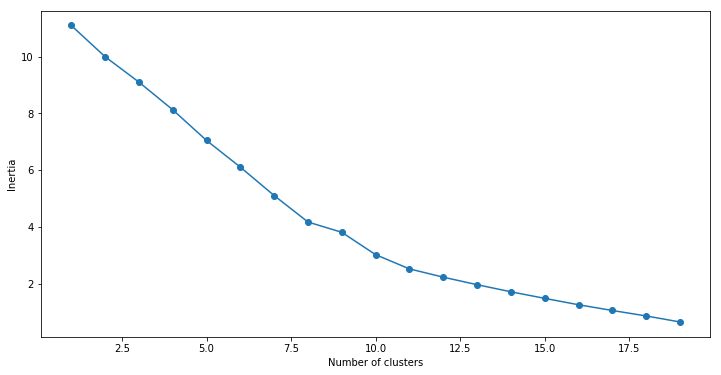

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_grouped_clustering)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<font color=blue> Conclusion on K- means , K values :</font>

Here we can clearly see that a possible range of values from 5-8 seems optimum for K - means clustering anaysis here

# Thank you 